In [1]:
# In this example, we use the TensorFlow library to load the MNIST data,
# define a model with three dense layers, compile the model, train it
# for 10 epochs, evaluate it on the test set, and make predictions on
# the test set. Finally, we plot some examples of the predictions made
# by the model.

# Multi-layer Perceptron (MLP) classifier with L2 regularization

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-02-20 15:06:02.388143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 15:06:02.435819: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
# Read data from TF datasets and preprocess
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255
x_test = x_test / 255


# Flatten the 2D images into 1D arrays
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Convert the labels into one-hot encoded arrays
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# Define the model
# The number of parameters depends on the shapes and sizes of the layers.
# In the given model, the first layer Dense(512, activation='relu',
# input_shape=(784,)) has 784 input nodes and 512 output nodes. Therefore,
# the number of parameters in this layer would be (784 * 512) + 512 = 401920,
# where the +512 term is for the bias terms.
# The second layer also has 512 input nodes and 512 output nodes, which makes
# 512512 = 262,144 parameters. The third and last layer has 512 input nodes
# and 10 output nodes, which makes 512*10 = 5,120 parameters.

In [5]:
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
#keras.layers.Dropout(0.5),
#model.add(tf.keras.layers.Dense(512, activation='relu'))
#keras.layers.Dropout(0.5),
#model.add(tf.keras.layers.Dense(10, activation='softmax'))

# over come overfitting by regularization
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001),input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(10, activation='softmax')
])

2023-02-20 15:06:42.629084: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 0.4634 - accuracy: 0.9061 - val_loss: 0.3224 - val_accuracy: 0.9420
Epoch 2/10
938/938 [==============================] - 1s 910us/step - loss: 0.2827 - accuracy: 0.9509 - val_loss: 0.2546 - val_accuracy: 0.9578
Epoch 3/10
938/938 [==============================] - 1s 878us/step - loss: 0.2385 - accuracy: 0.9614 - val_loss: 0.2183 - val_accuracy: 0.9634
Epoch 4/10
938/938 [==============================] - 1s 883us/step - loss: 0.2134 - accuracy: 0.9654 - val_loss: 0.2038 - val_accuracy: 0.9673
Epoch 5/10
938/938 [==============================] - 1s 893us/step - loss: 0.1966 - accuracy: 0.9687 - val_loss: 0.1974 - val_accuracy: 0.9678
Epoch 6/10
938/938 [==============================] - 1s 902us/step - loss: 0.1846 - accuracy: 0.9713 - val_loss: 0.1833 - val_accuracy: 0.9706
Epoch 7/10
938/938 [==============================] - 1s 885us/step - loss: 0.1748 - accuracy: 0.9728 - val_loss: 0.1856 - val_accuracy: 0

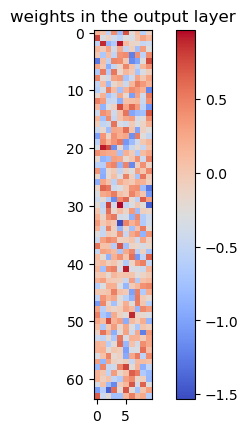

In [7]:
# Train the model and record the history
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Get the weights of the Dense layer
# plot the weights as a heatmap or image, where the weights are represented
# as pixel values.
# model.layers[2].get_weights()[0] returns only the weights of the third
# layer. If you wanted to get the biases, you would use
# model.layers[2].get_weights()[1].
dense_weights = model.layers[2].get_weights()[0]

# Plot the weights as a heatmap
plt.imshow(dense_weights, cmap='coolwarm')
plt.colorbar()
plt.title('weights in the output layer')
plt.show()

In [ ]:
# Plot the loss during training
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
# Plot some examples from the test set and their predictions
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.ravel()):
    ax.matshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("True: %d\nPredict: %d" % (np.argmax(y_test[i]), y_pred[i]))
    ax.axis("off")

plt.show()